In [1]:
import numpy as np
import matplotlib.pyplot as plt

# orcale to find a greedy solution 
# (also optimal solution for the designed mu here, since the marginal gains are decreasing)
def oracle(mu, Q):
    r = 0 # reward
    a = np.zeros(mu.shape[0], dtype=int) # action
    # marginal gain of resources
    tmp = np.array(mu[:,0])
    for i in range(Q):
        j = np.argmax(tmp)
        a[j] += 1
        if i != Q - 1:
            # marginal gain of adding one more budget to resource j
            tmp[j] = mu[j, a[j]] - mu[j, a[j]-1]
    for i in range(mu.shape[0]):
        if a[i] != 0:
            r += mu[i,a[i]-1]
    return a, r

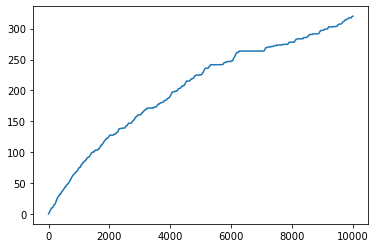

In [2]:
T = 10000
Q = 3
mu = np.array([[0.1, 0.2, 0.3],[0.3,0.5,0.7],[0.5,0.5,0.5]])

a_opt, r_opt = oracle(mu, Q) # optiaml action is (0, 2, 1), optiaml reward is 1.0
mu_hat = np.ones_like(mu) # empirical mean
T_ka = np.ones_like(mu) # total number of times arm (k,a) is played
reg = np.zeros(T)

for t in range(T):
    rho_ka = np.sqrt(3*np.log(t+1)/(2*T_ka))
    mu_bar = np.minimum(mu_hat + rho_ka, 1) # UCB
    a, _ = oracle(mu_bar, Q)
    r = 0
    # calculate the expected reward of action a
    for i in range(a.shape[0]):
        if a[i] != 0:
            j = a[i] - 1
            r += mu[i,j]
            T_ka[i, j] += 1
            X_k = int(np.random.rand() < mu[i, j])
            mu_hat[i, j] += (X_k - mu_hat[i, j]) / T_ka[i, j]
    # calculate regert
    reg[t] = r_opt - r

# plot cumulative regert    
plt.plot(np.cumsum(reg))